<a href="https://colab.research.google.com/github/dibahk/Applied-Statistics/blob/main/Assignment3_Diba_Hadji_Kazemi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 1

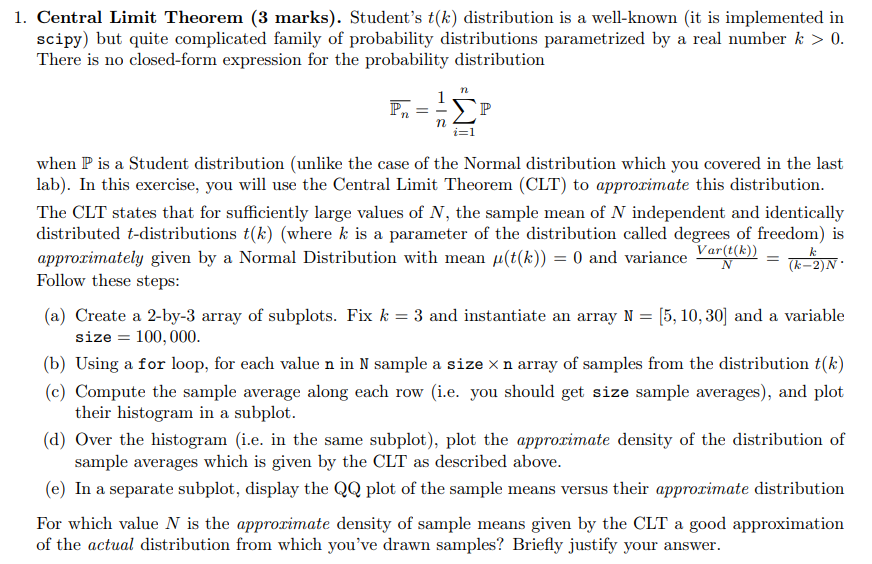

a) a figure with given requirements is created

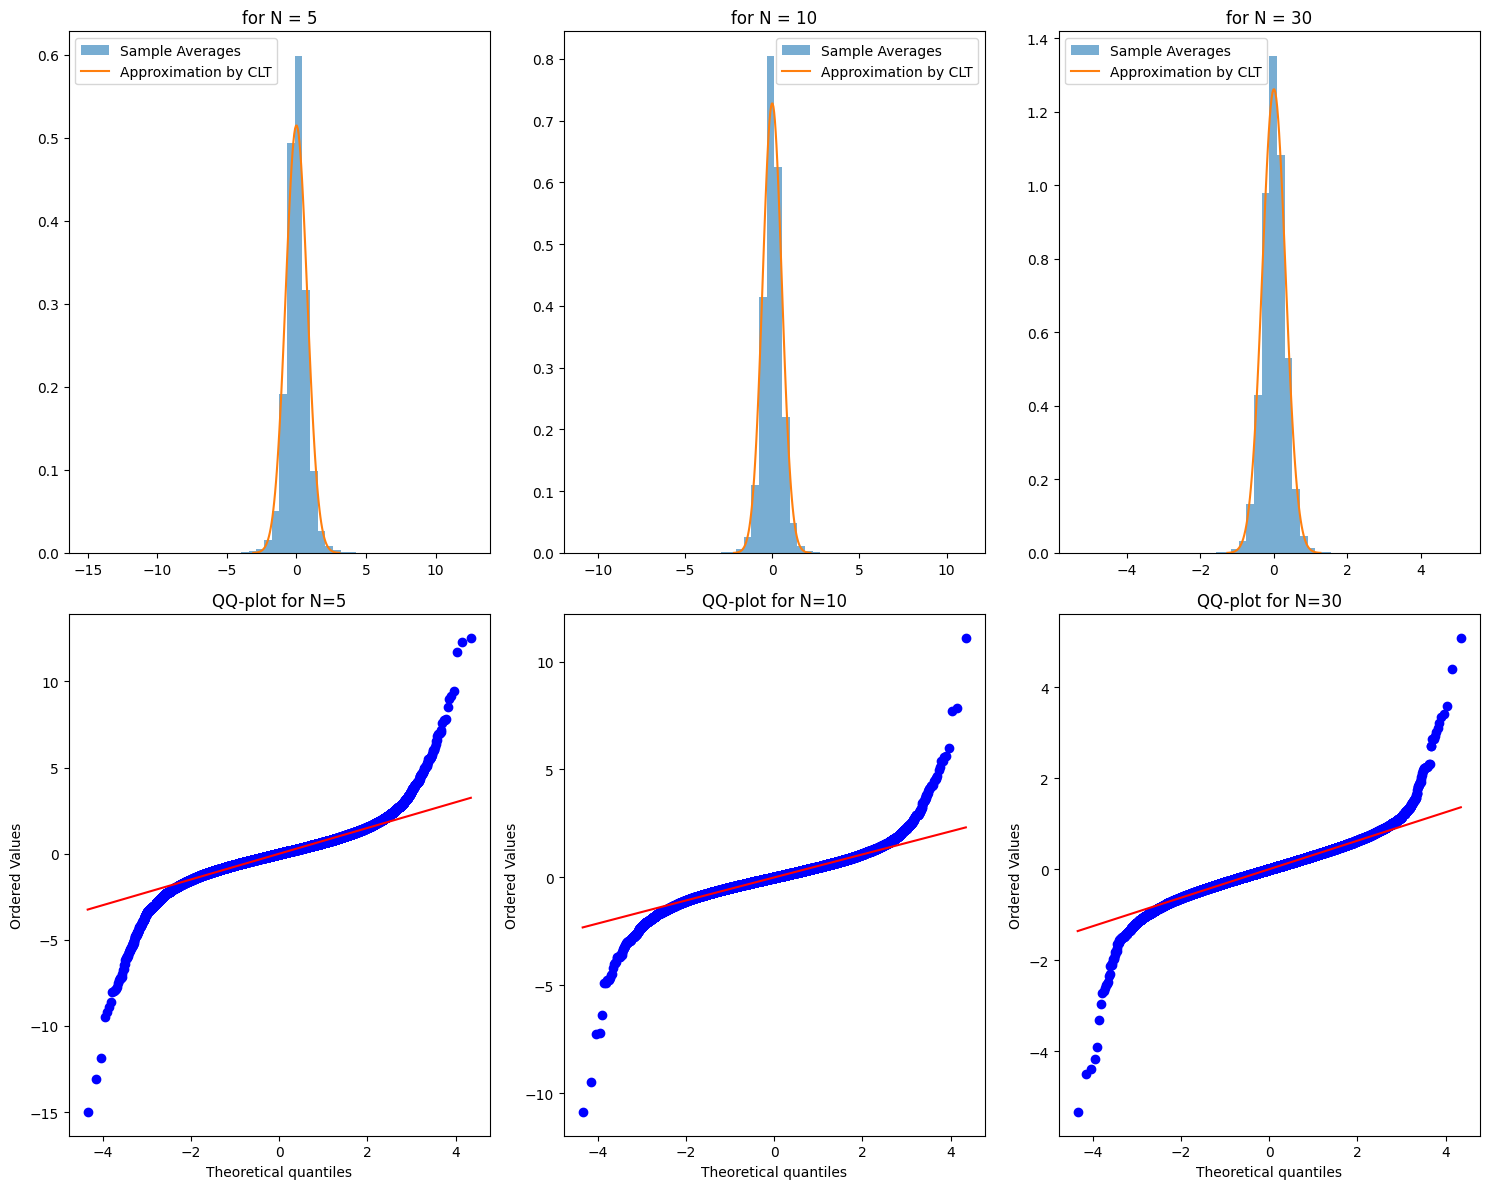

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
#a
k = 3 #degree of freedom
N = [5, 10, 30] #number of samples
sizes = 100000

fig, ax = plt.subplots(2, 3, figsize=(15,12))

#b
for i, n in enumerate(N):
  samples = np.random.standard_t(df=k, size=(sizes, n))
  #c) computing the average and plotting their histogram
  sample_average = np.mean(samples, axis=1)
  ax[0, i].hist(sample_average, bins=50, density=True, alpha=0.6, label='Sample Averages')

  # d
  sigma = np.sqrt(k/((k-2)*n))
  x = np.linspace(-4*sigma, 4*sigma, 100)
  ax[0, i].plot(x, stats.norm.pdf(x, 0, sigma), label='Approximation by CLT')
  ax[0, i].set_title('for N = {}'.format(n))
  ax[0, i].legend()

  # e
  stats.probplot(sample_average, dist="norm", plot=ax[1,i])
  ax[1, i].set_title('QQ-plot for N={}'.format(n))

plt.tight_layout()
plt.show()

for N=30 the approximate density given by CLT is a good a good approximation to the actual distribution and that's both evident from the QQ plot and histograms. In the QQ-plot the N=30 plot has the smallest deviations from the normal line, moreover, the CLT approximate line and the histogram of N=30 match the best.

## Question 2

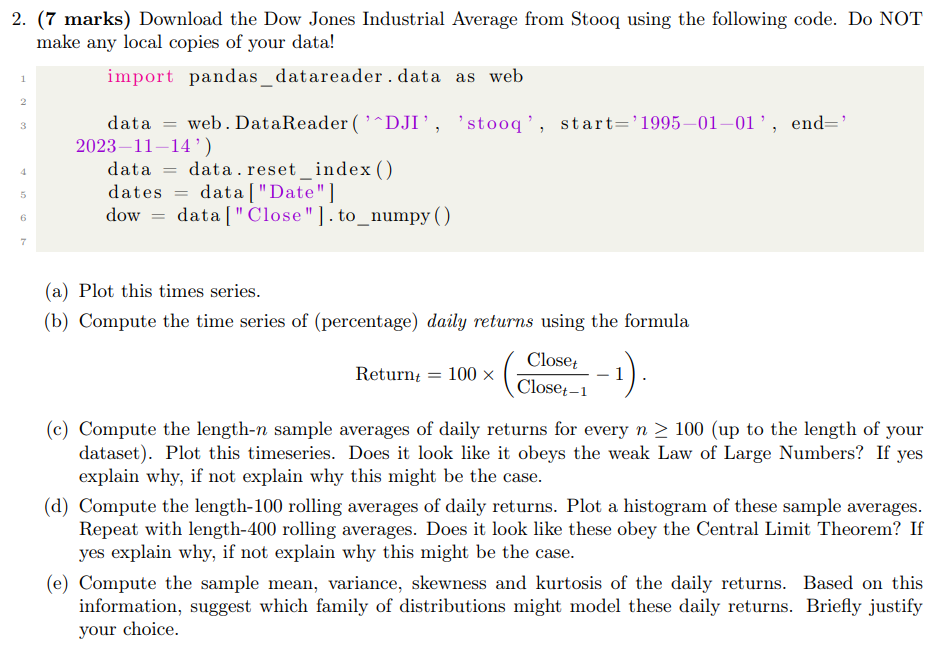

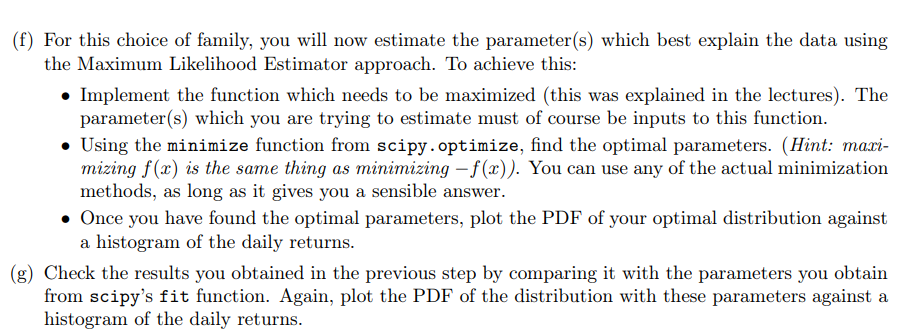

In [ ]:
import pandas_datareader.data as web
data = web.DataReader('^DJI', 'stooq', start= '1995-01-01' , end= '2023-11-14')
data = data.reset_index()
dates = data["Date"]
dow = data ["Close"].to_numpy ()

In [ ]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2023-11-14,34581.20,34931.01,34581.20,34827.70,333309169.0
1,2023-11-13,34259.25,34405.84,34205.81,34337.87,248845725.0
2,2023-11-10,34020.82,34310.36,33905.62,34283.10,305324236.0
3,2023-11-09,34163.71,34167.54,33859.77,33891.94,333027530.0
4,2023-11-08,34185.92,34252.75,33996.20,34112.27,282794277.0


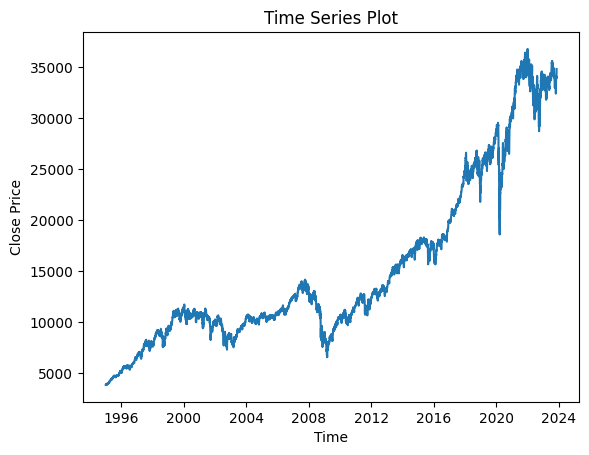

In [ ]:
#a)
plt.plot(dates, dow)
plt.title('Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.show()

In [ ]:
#b)
Return = 100*(dow[1:]/dow[:-1] - 1)
Return

array([-1.40643798, -0.1595032 , -1.14097033, ..., -0.42664322,
        0.1765821 , -0.49770589])

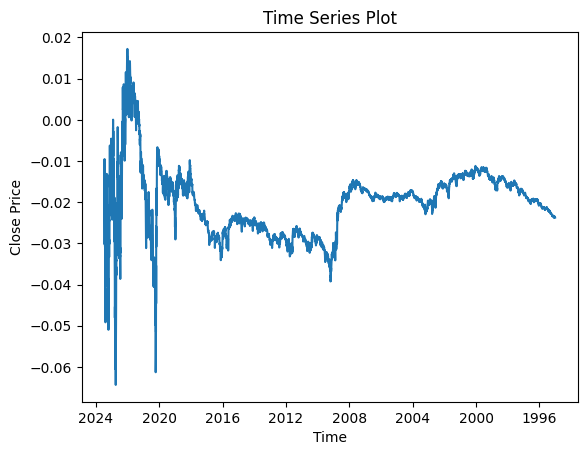

In [ ]:
# c)
samp_avg = []
for i, n in enumerate(range(100,Return.shape[0]+1)):
  samp_avg.append(np.mean(Return[0:n]))
plt.plot(dates[100:],samp_avg)
plt.gca().invert_xaxis()
# plt.xticks(dates[100:])
plt.title('Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.show()

As it can be seen from the plot in the begining of the time series the sample averages flactuate, and that is because since the sample size is small the addition of new data to the sample affects its average, and as the length of the samples increases the sample of averages converge and therefore, the distribution obeys the Weak Law of Large Numbers. Moreover, this plot averages converges to a number called sample mean.

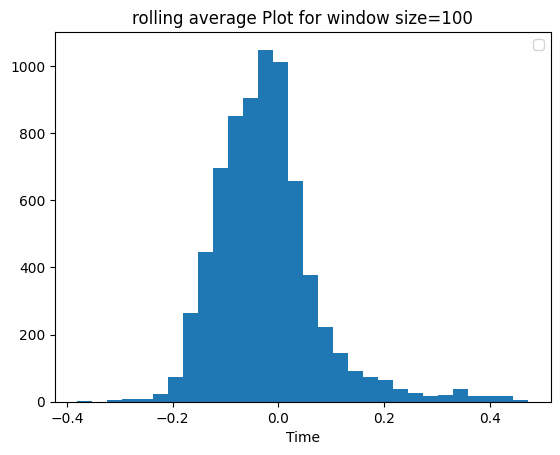

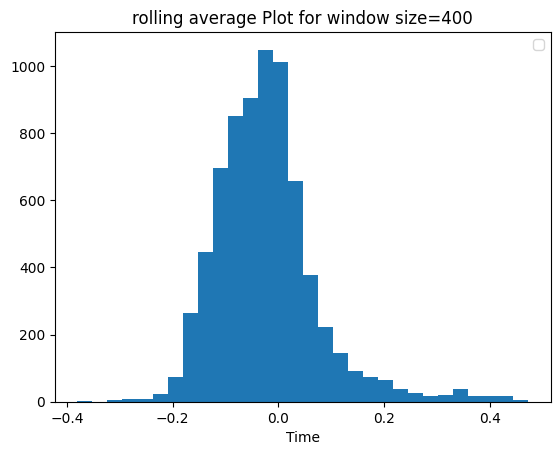

In [ ]:
# d

for i in [100, 400]:
  plt.figure()
  roll_avg = []
  for j, n in enumerate(range(100,Return.shape[0]+1)):
    roll_avg.append(np.mean(Return[j:n]))
  plt.hist(roll_avg, bins= 30)
  plt.title(f'rolling average Plot for window size={i}')
  plt.xlabel('Time')
  plt.legend()


The Central Limit Theorem says that the distribution of the sample means of a sufficiently large number of independent, identically distributed random variables, regardless of the original distribution of the variables, will be approximately normally distributed.This histogram in both cases follow a bell shaped curve resembelling a normal distribution which means it's following the central limit theorem.

In [ ]:
# e)
mean = np.mean(Return)
variance = np.var(Return, ddof=1)  # ddof=1 for sample variance
skewness = stats.skew(Return)
kurt = stats.kurtosis(Return, fisher=False)
print(f"Sample Mean: {mean}")
print(f"Sample Variance: {variance}")
print(f"Sample Skewness: {skewness}")
print(f"Sample Kurtosis: {kurt}")

Sample Mean: -0.023722955410124806
Sample Variance: 1.3282496804110615
Sample Skewness: 0.6480631209171596
Sample Kurtosis: 15.97781454831144


High values of kurtosis indicate heavy tails or higher peaks and the negative value of skewness means this sample is skewed to the left.

Due to these point **t-distribution** can be chosen as a model for this sample because in comparison with normal distribution, this distribution has heavier tails.

In [ ]:
# f)
from scipy.stats import t
from scipy.optimize import minimize

def neg_log_likelihood(params, data):
    df, loc, scale = params
    return -np.sum(t.logpdf(data, df=df, loc=loc, scale=scale))

initial_guess = [2, np.mean(Return), np.std(Return)]
result = minimize(neg_log_likelihood, initial_guess, args=(Return,))
(df_value, loc_value, scale_value) = result.x

print(f"Optimal parameters (df, loc, scale): {df_value, loc_value, scale_value}")

Optimal parameters (df, loc, scale): (2.853489799972756, -0.06273682822291174, 0.6888138716013298)


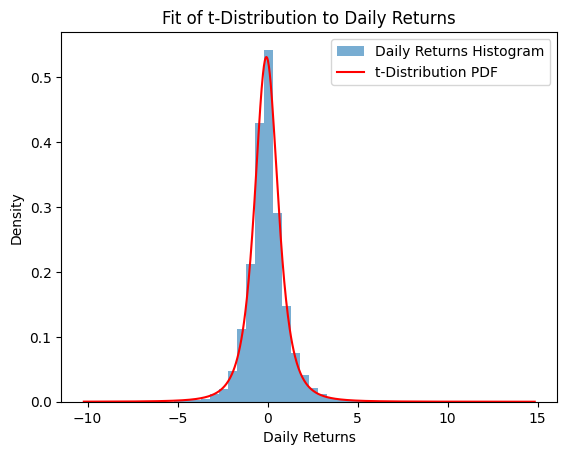

In [ ]:
# g)
plt.figure()
plt.hist(Return, bins=50, density=True, alpha=0.6, label='Daily Returns Histogram')

x_values = np.linspace(min(Return), max(Return), 1000)
pdf_values = t.pdf(x_values, df=df_value, loc=loc_value, scale=scale_value)

plt.plot(x_values, pdf_values, 'r-', label='t-Distribution PDF')

plt.title('Fit of t-Distribution to Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.legend()
plt.show()

just as it can be seen the t-distribution represents our data to a great extent